In [56]:
import pandas as pd
from sklearn.datasets import load_iris

In [57]:
iris = load_iris()
iris.data[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [58]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [59]:
dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
df = dataframe.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'Petal Width')

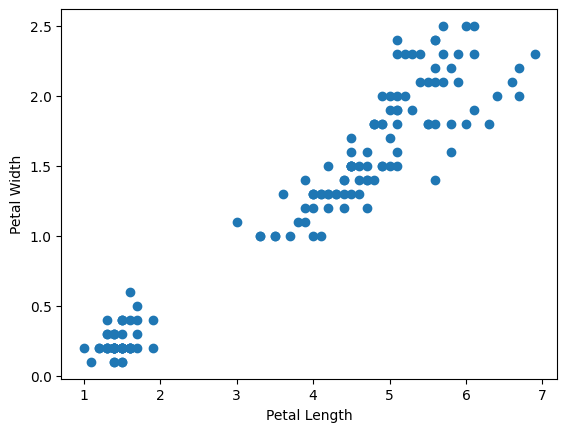

In [61]:
import matplotlib.pyplot as plt
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [74]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df)
df['clusters'] = y_predicted
df.clusters.unique()

array([2, 0, 1], dtype=int32)

C:\Users\user\AppData\Local\Temp\ipykernel_9840\214283634.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


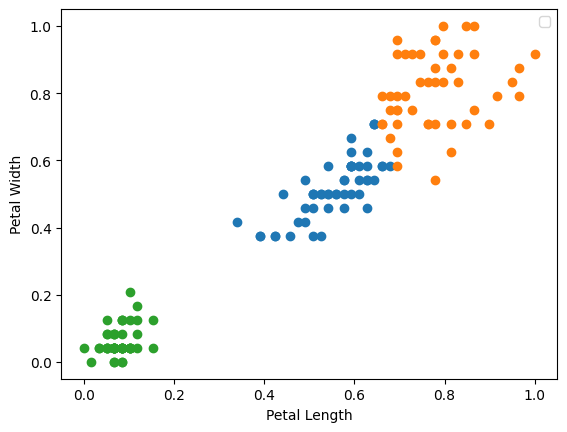

In [75]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'])
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [77]:
df.head(70)

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2
...,...,...,...
65,0.576271,0.541667,0
66,0.593220,0.583333,0
67,0.525424,0.375000,0
68,0.593220,0.583333,0


In [79]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
df['clusters'] = y_predicted

In [78]:
df.clusters.unique()

array([2, 0, 1], dtype=int32)

C:\Users\user\AppData\Local\Temp\ipykernel_9840\3484198786.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


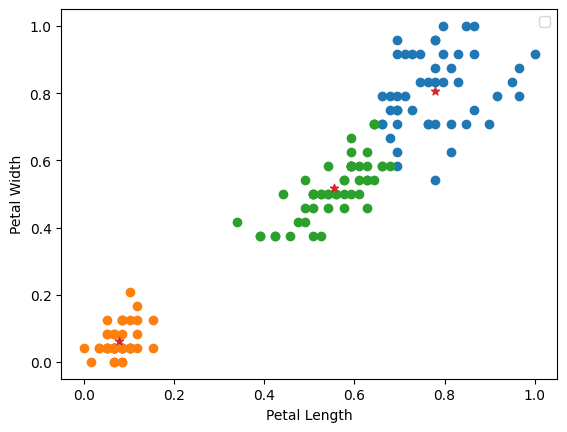

In [80]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'])
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*')

plt.legend()

In [69]:
k_rng = range(1,10)
sse = []

for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(df)
  sse.append(km.inertia_)


In [70]:
sse

[130.3416865530605,
 30.136463590044364,
 1.8203046602036208,
 1.4055142608744353,
 1.1611615614572517,
 0.8375237756709656,
 0.6196485581025934,
 0.5807013894876256,
 0.518647307622204]

Text(0, 0.5, 'SSE')

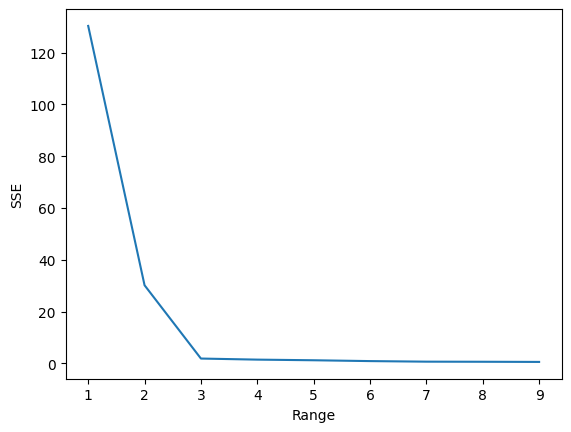

In [71]:
plt.plot(k_rng, sse)
plt.xlabel('Range')
plt.ylabel('SSE')